## Linear Regression

### Regression on Diamonds Dataset

Welcome, my name is Han Oktavianus in this notebook I will try to implement my knowledged from what I learned about Data Sciene in DataCamp. I already download the type of a Diamonds dataset and I will try to predict it with Linear Regression, Ridge, Lasso, AdaBoost, GradientBoost, RandomForestRegressor, and KNN Regressor.

### Step 1 : Import the libraries

In [1]:

# Ignore warnings :
import warnings
warnings.filterwarnings('ignore')


# Handle table-like data and matrices :
import numpy as np
import pandas as pd

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor 
from sklearn.neighbors import KNeighborsRegressor

# Modelling Helpers :
from sklearn.preprocessing import Normalizer, scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score



#preprocessing :
from sklearn.preprocessing import MinMaxScaler , StandardScaler, LabelEncoder


# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 


# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns


### Step 2 : EDA(Exploratory Data Analysis)

In [2]:
# First Load the dataset and visualize its first elements

df = pd.read_csv('diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
# Let us take a good look the features

df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [4]:
# We will drop the column unnamed since there are no important value

df.drop(['Unnamed: 0'], axis=1,inplace=True)
df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
# Let us check the size of this dataset

df.shape

(53940, 10)

In [6]:
# Check the features type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [7]:
# Check if there are some null values

df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [8]:
# Let us take a good look of our data by using desribe()

df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [9]:
# It seems that we have zero values, let's look more detail.

df.loc[(df['x']==0) | (df['y']==0) | (df['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [10]:
# Let us check how many zero values that we have

len(df[(df['x']==0) | (df['y']==0) | (df['z']==0)])

20

In [11]:
# Remove the zero values

df=df[(df[['x','y','z']] != 0).all(axis=1)]

In [12]:
# Double check to make sure that zero value already been removed

df.loc[(df['x']==0) | (df['y']==0) | (df['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z


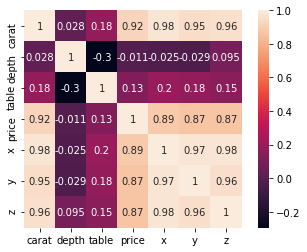

In [13]:
# Ploting heatmap to have a better visualization about the features correlation

sns.heatmap(df.corr(), square=True,annot=True,cbar=True)

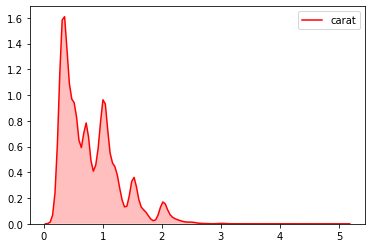

In [14]:
# The carat distribution

sns.kdeplot(df['carat'], shade=True, color='r')

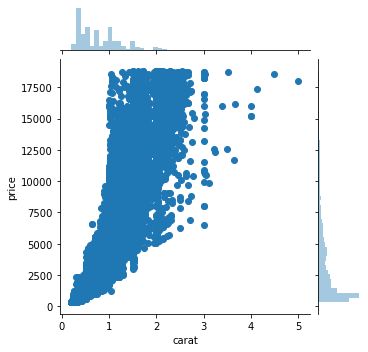

In [15]:
# Carat vs Price

sns.jointplot(x='carat', y='price', data=df, size=5)

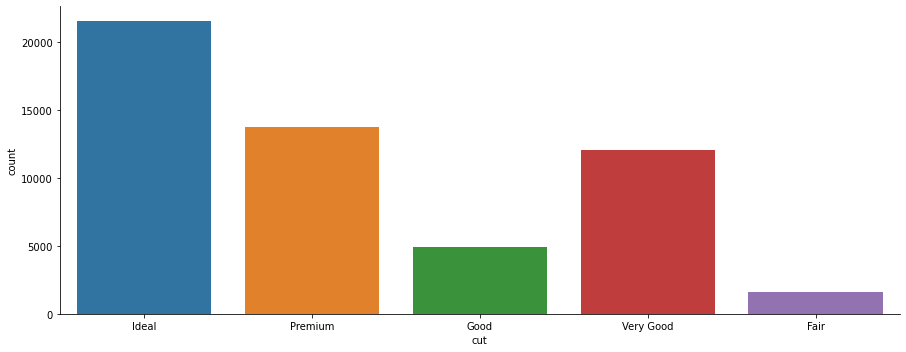

In [16]:
# The cut ditribution

sns.factorplot(x='cut', data=df, kind='count', aspect=2.5)

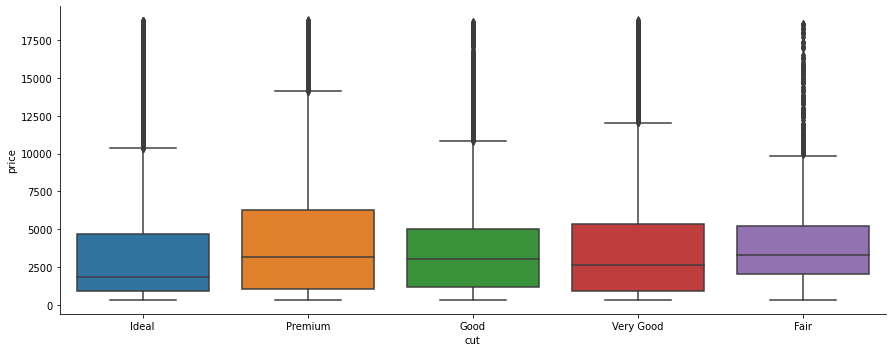

In [17]:
# Cut vs Price

sns.factorplot(x='cut', y='price', data=df, kind='box', aspect=2.5)

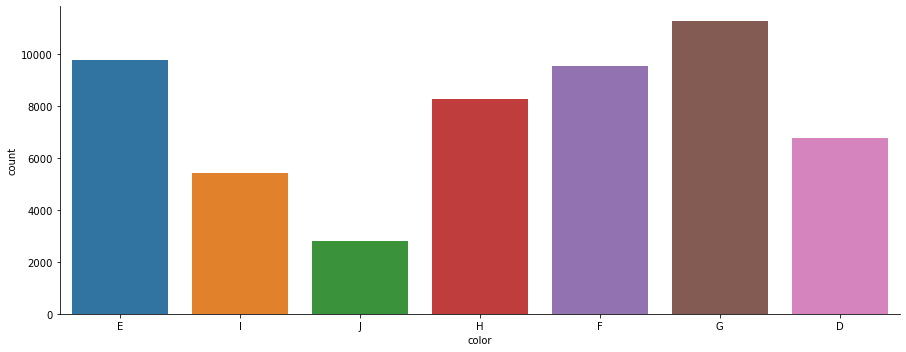

In [18]:
# The color distribution

sns.factorplot(x='color',data=df, kind='count',aspect=2.5)

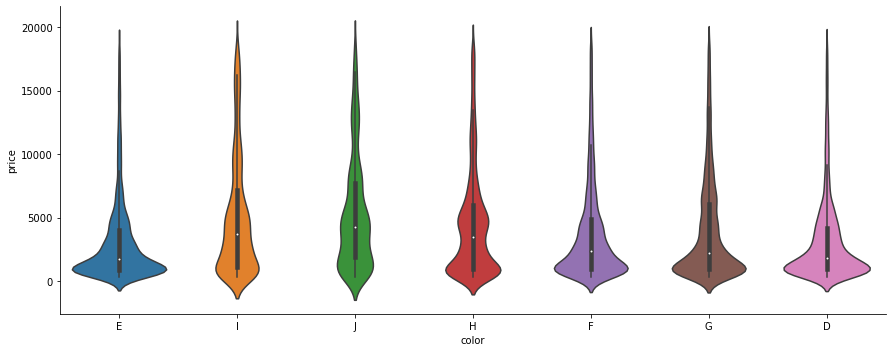

In [19]:
# Color vs price

sns.factorplot(x='color', y='price',data=df,kind='violin',aspect=2.5)

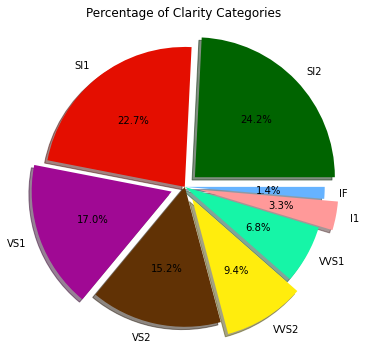

In [20]:
# The clarity distribution

labels = df.clarity.unique().tolist()
sizes = df.clarity.value_counts().tolist()
colors = ['#006400', '#E40E00', '#A00994', '#613205', '#FFED0D', '#16F5A7','#ff9999','#66b3ff']
explode = (0.1, 0.0, 0.1, 0, 0.1, 0, 0.1,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=0)
plt.axis('equal')
plt.title("Percentage of Clarity Categories")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

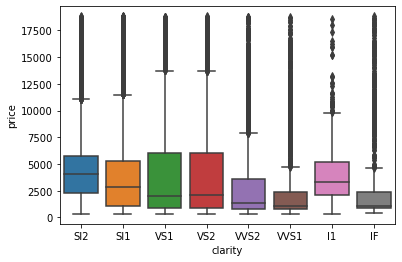

In [21]:


sns.boxplot(x='clarity', y='price', data=df)

(array([3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 4.0000e+00, 1.1000e+01, 4.3000e+01, 2.1900e+02,
        1.4240e+03, 5.0730e+03, 1.8242e+04, 2.2649e+04, 5.0330e+03,
        8.5100e+02, 2.3400e+02, 8.7000e+01, 2.7000e+01, 1.1000e+01,
        3.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([43.  , 44.44, 45.88, 47.32, 48.76, 50.2 , 51.64, 53.08, 54.52,
        55.96, 57.4 , 58.84, 60.28, 61.72, 63.16, 64.6 , 66.04, 67.48,
        68.92, 70.36, 71.8 , 73.24, 74.68, 76.12, 77.56, 79.  ]),
 <a list of 25 Patch objects>)

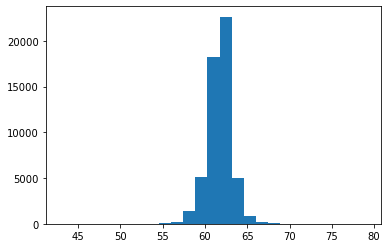

In [22]:
# The depth distribution

plt.hist('depth', data=df, bins=25)

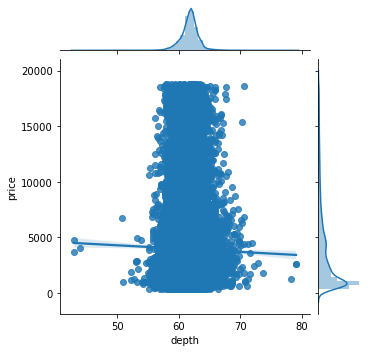

In [23]:
# Depth vs Price

sns.jointplot(x='depth', y='price', data=df, kind='regplot', size=5)

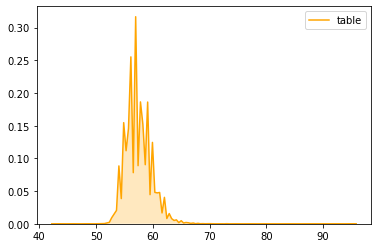

In [24]:
# The table distribution

sns.kdeplot(df['table'], shade=True, color='orange')

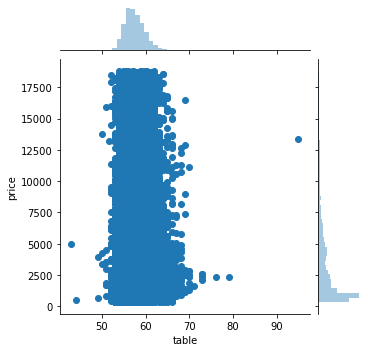

In [25]:
# Table vs Price

sns.jointplot(x='table', y='price', data=df, size=5)

(2.0, 10.0)

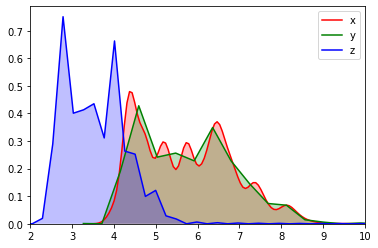

In [26]:
# X : Length, Y : Width, Z: Height of the diamond. Let us plot them together.

sns.kdeplot(df['x'], shade=True, color='r')
sns.kdeplot(df['y'], shade=True, color='g')
sns.kdeplot(df['z'], shade=True, color='b')
plt.xlim(2,10)

In [27]:
# We do selection feature our dataset by multiple these feature(X,y,z)to make it more simple and to reduce the complexity.

df['volume'] = df['x']*df['y']*df['z']
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


(0.0, 50000.0)

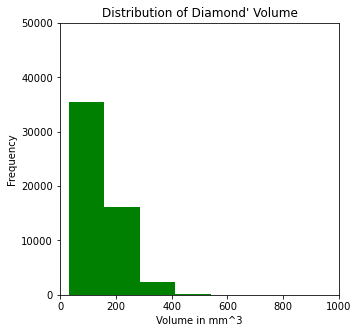

In [28]:
# Let us plot the new feature

plt.figure(figsize=(5,5))
plt.hist(x=df['volume'],bins=30, color='g')
plt.xlabel('Volume in mm^3')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond\' Volume')
plt.xlim(0,1000)
plt.ylim(0, 50000)

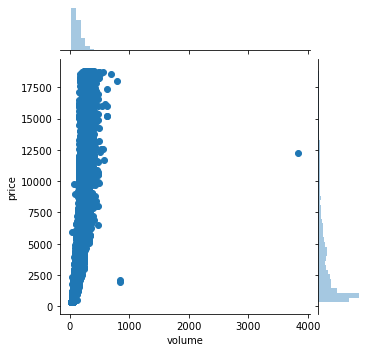

In [29]:
# Volume vs Price

sns.jointplot(x='volume', y='price', data=df, size=5)

## Step 3 : Preprocessing Data

In [30]:
# Remove X,y,z feature since we already volume feature

df.drop(['x','y','z'], axis=1, inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250


In [31]:
# Change categorical data into numerical data

label = LabelEncoder()

df['cut'] = label.fit_transform(df['cut'])
df['color'] = label.fit_transform(df['color'])
df['clarity'] = label.fit_transform(df['clarity'])

In [32]:
# Seperate the feature and the target. And split them into train test set

X = df.drop(['price'], axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=66)

In [33]:
# We normalize the data to avoid bias data

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [34]:
# Make a variable to store the result from the model

R2_Scores= []
models = ['Linear Regression' , 'Lasso Regression' , 'AdaBoost Regression' , 'Ridge Regression' , 'GradientBoosting Regression',
          'RandomForest Regression' ,
         'KNeighbours Regression']

## Step 4 : Build Models

In [35]:
# Linear Regression model

clf_lr = LinearRegression()
clf_lr.fit(X_train, y_train)
accuracies = cross_val_score(estimator = clf_lr, X= X_train, y= y_train, cv=5, verbose= 1)
y_pred = clf_lr.predict(X_test)
print('')
print('######## Linear Regression ########')
print('Score : %.4f' % clf_lr.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error (y_test, y_pred)**0.5
r2= r2_score(y_test, y_pred)

print('')
print('MSE        : %0.2f' % mse)
print('MAE        : %0.2f' % mae)
print('RMSE       : %0.2f' % rmse)
print('R2         : %0.2f' % r2)

R2_Scores.append(r2)


######## Linear Regression ########
Score : 0.8814
[0.87116164 0.88350756 0.87757769 0.87635168 0.88384912]

MSE        : 1911966.08
MAE        : 936.61
RMSE       : 1382.74
R2         : 0.88


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [36]:
# Lasso regularization

clf_la= Lasso(normalize=True)
clf_la.fit(X_train, y_train)
accuracies = cross_val_score(estimator = clf_la, X=X_train, y= y_train, cv=5, verbose = 1)
y_pred = clf_la.predict(X_test)
print('')
print('#######  Lasso Regression #######')
print('Score : %.4f' %clf_la.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE     : %0.2f' % mse)
print('MAE     : %0.2f' % mae)
print('RMSE    : %0.2f' % rmse)
print('R2      : %0.2f' % r2)

R2_Scores.append(r2)


#######  Lasso Regression #######
Score : 0.8658
[0.84325995 0.86900907 0.86386374 0.86539938 0.86976969]

MSE     : 2163043.97
MAE     : 920.98
RMSE    : 1470.73
R2      : 0.87


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


In [37]:
# AdoBoostRegressor

clf_ar = AdaBoostRegressor(n_estimators=1000)
clf_ar.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_ar, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_ar.predict(X_test)
print('')
print('###### AdaBoost Regression ######')
print('Score : %.4f' % clf_ar.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



###### AdaBoost Regression ######
Score : 0.8987
[0.87262496 0.89308568 0.85760589 0.90141459 0.89987371]

MSE    : 1633510.25 
MAE    : 926.88 
RMSE   : 1278.09 
R2     : 0.90 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.6s finished


In [38]:
# Ridge regularization

clf_rr = Ridge(normalize=True)
clf_rr.fit(X_train, y_train)
accuracies = cross_val_score(estimator = clf_rr, X=X_train, y=y_train, cv=5,verbose=1)
y_pred = clf_rr.predict(X_test)
print('')
print('####### Ridge Regression #######')
print('Score : %.4f' % clf_rr.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE     : %0.2f' % mse)
print('MAE     : %0.2f' % mae)
print('RMSE    : %0.2f' % rmse)
print('R2      : %0.2f' % r2)

R2_Scores.append(r2)


####### Ridge Regression #######
Score : 0.7589
[0.74232856 0.75599775 0.74753493 0.75626    0.74960313]

MSE     : 3886496.69
MAE     : 1348.62
RMSE    : 1971.42
R2      : 0.76


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [39]:
# GradienBoost

clf_gbr = GradientBoostingRegressor(n_estimators=10, learning_rate=0.1, max_depth=1, random_state=0, loss='ls', verbose=1)
clf_gbr.fit(X_train, y_train)
accuracies = cross_val_score(estimator = clf_gbr, X= X_train, y= y_train, cv=5, verbose=1)
y_pred = clf_gbr.predict(X_test)
print('')
print('####### Gradient Boosting Regression #######')
print('Score  : %.4f' % clf_gbr.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print ('')
print ('MSE     : %0.2f' % mse)
print ('MAE     : %0.2f' % mae)
print ('RMSE    : %0.2f' % rmse)
print ('R2      : %0.2f' % r2)

R2_Scores.append(r2)

      Iter       Train Loss   Remaining Time 
         1    14009477.5296            0.23s
         2    12437807.7359            0.16s
         3    11113339.5845            0.12s
         4     9945244.2308            0.11s
         5     8973416.9156            0.09s
         6     8109014.7842            0.07s
         7     7387120.0500            0.05s
         8     6753937.9878            0.03s
         9     6197182.6819            0.02s
        10     5724689.0901            0.00s
      Iter       Train Loss   Remaining Time 
         1    13994442.1962            0.18s
         2    12429322.7982            0.14s
         3    11112606.0983            0.12s
         4     9944843.0686            0.09s
         5     8977395.9870            0.07s
         6     8111748.5741            0.05s
         7     7395490.7272            0.04s
         8     6765223.5285            0.03s
         9     6204866.4570            0.01s
        10     5734465.9748            0.00s
      It

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


         1    14044115.9884            0.40s
         2    12472837.6750            0.30s
         3    11137657.6396            0.22s
         4     9974212.6419            0.17s
         5     8994369.5031            0.12s
         6     8133396.8459            0.09s
         7     7407925.9669            0.06s
         8     6764110.5537            0.04s
         9     6215416.1793            0.02s
        10     5736700.1166            0.00s
      Iter       Train Loss   Remaining Time 
         1    14049930.2441            0.09s
         2    12464124.5936            0.11s
         3    11134339.1520            0.09s
         4     9963572.7604            0.08s
         5     8988544.3119            0.07s
         6     8123782.2835            0.05s
         7     7389901.0249            0.04s
         8     6746492.7030            0.02s
         9     6199732.4929            0.01s
        10     5719212.8946            0.00s
      Iter       Train Loss   Remaining Time 
        

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.8s finished


In [40]:
# Random Forest

clf_rf = RandomForestRegressor()
clf_rf.fit(X_train, y_train)
accuracies = cross_val_score(estimator = clf_rf, X=X_train, y=y_train, cv=5, verbose = 1)
y_pred = clf_rf.predict(X_test)
print('')
print('######## Random Forest ########')
print('Score : %.4f' % clf_rf.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f  ' % mse)
print('MAE    : %0.2f  ' % mae)
print('RMSE   : %0.2f  ' % rmse)
print('R2     : %0.2f  ' % r2)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   58.3s finished



######## Random Forest ########
Score : 0.9798
[0.97918593 0.980639   0.98168362 0.97744909 0.98155   ]

MSE    : 325023.43  
MAE    : 293.53  
RMSE   : 570.11  
R2     : 0.98  


In [41]:
# We got a pretty good R2 score from Random Forest, let's go deep with hyperparameter to see if we can have a better result


params_dict={'n_estimators' : [100,110],'min_samples_split':[2,3], 'n_jobs' : [-1], 'max_features' :["auto", 'sqrt', 'log2']}
grid_rf=GridSearchCV(estimator=RandomForestRegressor(),param_grid=params_dict, scoring='r2')
grid_rf.fit(X_train, y_train)
rf_best = grid_rf.best_estimator_
print('Score : %.4f' % grid_rf.best_score_)
pred=rf_best.predict(X_test)
r2=r2_score(y_test, pred)
print('R2    : %0.2f' % r2)
R2_Scores.append(r2)

Score : 0.9801
R2    : 0.98


In [42]:
# KNN

clf_knn = KNeighborsRegressor()
clf_knn.fit(X_train, y_train)
accuracies = cross_val_score(estimator= clf_knn, X=X_train, y=y_train, cv=5, verbose=1)
ypred = clf_knn.predict(X_test)
print('')
print('######## KNeighbours Regression #######')
print('Score  : %.4f' % clf_knn.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score (y_test, y_pred)

print('')
print('MSE     : %0.2f' % mse)
print('MAE     : %0.2f' % mae)
print('RMSE    : %0.2f' % rmse) 
print('R2      : %0.2f' % r2)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.3s finished



######## KNeighbours Regression #######
Score  : 0.9593
[0.95429058 0.95856983 0.95504994 0.94931403 0.95517559]

MSE     : 325023.43
MAE     : 293.53
RMSE    : 570.11
R2      : 0.98


In [43]:
# We got a pretty good R2 score from KNN model, let's go deep with hyperparameter to see if we can have a better result

params_dict={'n_neighbors':[5,7],'leaf_size':[30,35],'p':[1,2],'n_jobs':[-1]}
grid_knn=GridSearchCV(estimator=KNeighborsRegressor(), param_grid=params_dict,scoring='r2')
grid_knn.fit(X_train, y_train)
rf_best = grid_knn.best_estimator_
print('Score : %.4f' % grid_knn.best_score_)
pred=rf_best.predict(X_test)
r2 = r2_score(y_test, pred)
print('R2   : %0.2f' % r2)
R2_Scores.append(r2)

Score : 0.9597
R2   : 0.96


In [44]:
compare = pd.DataFrame({'Algorithms' : models, 'R2-Scores' : R2_Scores})
compare.sort_values(by='R2-Scores', ascending=False)

,Algorithms,R2-Scores
5,RandomForest Regression,0.980037
6,KNeighbours Regression,0.963068
2,AdaBoost Regression,0.898670
0,Linear Regression,0.881397
1,Lasso Regression,0.865822
3,Ridge Regression,0.758912
4,GradientBoosting Regression,0.639692


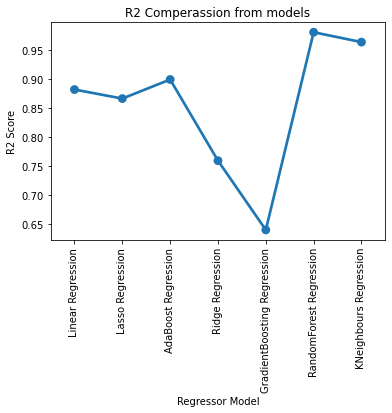

In [45]:
# Let us plot the result

f,ax=plt.subplots()
sns.pointplot(x=models, y=R2_Scores)
plt.xlabel('Regressor Model')
ax.set_xticklabels(models,rotation=90)
plt.ylabel('R2 Score')
plt.title('R2 Comperassion from models')
plt.show()

## Step 5 : Conclusion

The best result it is from Random Forest Regressor, although we did not clean the outliers, the model seems take it very well. Thank you for your attention.